In [1]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt,warnings,statsmodels,statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [4]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
# removing hum lower outlier
Q1=int(df["hum"].quantile([0.25]))
Q3=int(df["hum"].quantile([0.75]))
IQR=Q3-Q1
Lo=Q1-1.5*IQR
df["hum"]=df["hum"].apply(lambda x:Lo if x<Lo else x)

In [6]:
def func(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    elif x==4:
        return "winter"
        
df.season=df.season.apply(lambda x:func(x))

In [7]:
# create dummies for season columns
seasons=pd.get_dummies(df["season"],drop_first=True)
df=pd.concat([df,seasons],axis=1)

In [8]:
#dropping season col
df.drop("season",axis=1,inplace=True)

In [9]:
def func(x):
    if x==1:
        return "ClearW"
    elif x==2:
        return "MistW"
    elif x==3:
        return "LightSnow"
    elif x==4:
        return "HeavyRain"
        
df.weathersit=df.weathersit.apply(lambda x:func(x))

In [10]:
whether=pd.get_dummies(df["weathersit"])
df=pd.concat([df,whether],axis=1)

In [11]:
df.drop("weathersit",axis=1,inplace=True)

In [12]:
df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,ClearW,LightSnow,MistW
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.995890,0.690411,20.319259,23.726322,62.799707,12.763620,4508.006849,0.246575,0.252055,0.243836,0.634247,0.028767,0.336986
std,0.500343,3.450215,0.167266,2.000339,0.462641,7.506729,8.150308,14.114193,5.195841,1936.011647,0.431313,0.434490,0.429689,0.481971,0.167266,0.473004
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,22.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Spliting test and test datatsets.
X_df,y_df=train_test_split(df,train_size=0.7,random_state=100)

### MinMaxScaling on train data

In [14]:
#group which columns are integers for scalling
col_nam=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
scale=MinMaxScaler()
X_df[col_nam]=scale.fit_transform(X_df[col_nam])
X_df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,ClearW,LightSnow,MistW
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.491830,0.711765,0.537440,0.513156,0.548670,0.320883,0.513499,0.243137,0.247059,0.247059,0.625490,0.029412,0.345098
std,0.500429,0.315038,0.157763,0.329528,0.453386,0.225858,0.212410,0.186213,0.169803,0.224421,0.429398,0.431725,0.431725,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.403387,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.552193,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.682954,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### checking correlation matrix

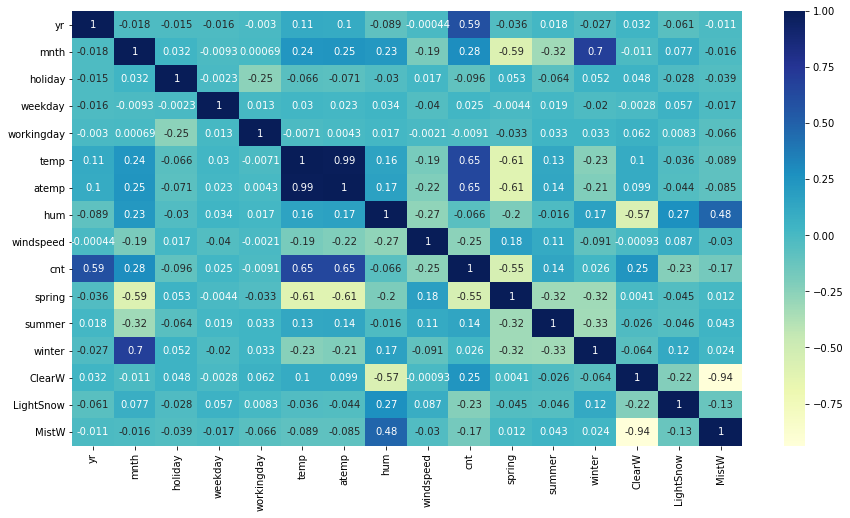

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(X_df.corr(),cmap="YlGnBu",annot=True);

In [16]:
y_train=X_df.pop("cnt")
X_train=X_df

### Model 1:

In [17]:
#Building model for train dataset
X_train_sm=sm.add_constant(X_train)
lm_1=sm.OLS(y_train,X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          1.23e-179
Time:                        16:17:22   Log-Likelihood:                 489.56
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     495   BIC:                            -885.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1213      0.028      4.277      0.000       0.066       0.177
yr             0.2310      0.008     27.239      0.000       0.214       0.248
mnth           0.0178      0.026      0.684      0.494      -0.033       0.069
holiday       -0.1012      0.028     -3.674      0.000      -0.155      -0.047
weekday        0.0179      0.013      1.403      0.161      -0.007       0.043
workingday    -0.0200      0.010     -2.082      0.038      -0.039      -0.001
temp           0.4308      0.141      3.056      0.002       0.154       0.708
atemp          0.0657      0.144      0.456      0.648      -0.217       0.349
hum           -0.1114      0.031     -3.551      0.000      -0.173      -0.050
windspeed     -0.1792      0.027     -6.532      0.000      -0.233      -0.125
spring        -0.0691      0.023     -2.955      0.003      -0.115      -0.023
summer         0.0471      0.016      2.975      0.003       0.016       0.078
winter         0.0815      0.019      4.313      0.000       0.044       0.119
ClearW         0.1377      0.012     11.702      0.000       0.115       0.161
LightSnow     -0.1009      0.023     -4.452      0.000      -0.145      -0.056
MistW          0.0845      0.012      6.898      0.000       0.060       0.109
==============================================================================
Omnibus:                       67.353   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.696
Skew:                          -0.688   Prob(JB):                     4.69e-36
Kurtosis:                       5.400   Cond. No.                     3.06e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
# also see vif value for predictor
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,58.31
6,atemp,53.82
12,ClearW,45.13
14,MistW,27.70
9,spring,5.81
1,mnth,3.88
11,winter,3.83
13,LightSnow,3.70
10,summer,2.69
7,hum,1.96


In [19]:
#here we dropping atemp from data
X_train.drop("atemp",axis=1,inplace=True)

### Model 2:

In [20]:
X_train_sm=sm.add_constant(X_train)
lm_2=sm.OLS(y_train,X_train_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          9.86e-181
Time:                        16:17:23   Log-Likelihood:                 489.46
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     496   BIC:                            -891.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1209      0.028      4.267      0.000       0.065       0.177
yr             0.2309      0.008     27.257      0.000       0.214       0.248
mnth           0.0179      0.026      0.686      0.493      -0.033       0.069
holiday       -0.1015      0.028     -3.687      0.000      -0.156      -0.047
weekday        0.0175      0.013      1.380      0.168      -0.007       0.042
workingday    -0.0197      0.010     -2.060      0.040      -0.039      -0.001
temp           0.4931      0.035     14.215      0.000       0.425       0.561
hum           -0.1107      0.031     -3.536      0.000      -0.172      -0.049
windspeed     -0.1816      0.027     -6.755      0.000      -0.234      -0.129
spring        -0.0680      0.023     -2.925      0.004      -0.114      -0.022
summer         0.0484      0.016      3.103      0.002       0.018       0.079
winter         0.0830      0.019      4.455      0.000       0.046       0.120
ClearW         0.1378      0.012     11.732      0.000       0.115       0.161
LightSnow     -0.1015      0.023     -4.494      0.000      -0.146      -0.057
MistW          0.0846      0.012      6.907      0.000       0.061       0.109
==============================================================================
Omnibus:                       66.029   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.780
Skew:                          -0.675   Prob(JB):                     2.02e-35
Kurtosis:                       5.387   Cond. No.                     6.42e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
# also see vif value for predictor
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,ClearW,45.12
13,MistW,27.69
8,spring,5.74
1,mnth,3.88
10,winter,3.73
12,LightSnow,3.69
5,temp,3.54
9,summer,2.61
6,hum,1.96
7,windspeed,1.20


In [22]:
X_train.drop("mnth",axis=1,inplace=True)

### Model 3:

In [23]:
X_train_sm=sm.add_constant(X_train)
lm_3=sm.OLS(y_train,X_train_sm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.7
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          8.60e-182
Time:                        16:17:24   Log-Likelihood:                 489.21
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     497   BIC:                            -897.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1275      0.027      4.790      0.000       0.075       0.180
yr             0.2307      0.008     27.266      0.000       0.214       0.247
holiday       -0.1010      0.028     -3.672      0.000      -0.155      -0.047
weekday        0.0176      0.013      1.384      0.167      -0.007       0.042
workingday    -0.0200      0.010     -2.085      0.038      -0.039      -0.001
temp           0.4941      0.035     14.261      0.000       0.426       0.562
hum           -0.1087      0.031     -3.489      0.001      -0.170      -0.047
windspeed     -0.1812      0.027     -6.743      0.000      -0.234      -0.128
spring        -0.0752      0.021     -3.631      0.000      -0.116      -0.035
summer         0.0435      0.014      3.135      0.002       0.016       0.071
winter         0.0882      0.017      5.185      0.000       0.055       0.122
ClearW         0.1406      0.011     12.721      0.000       0.119       0.162
LightSnow     -0.0999      0.022     -4.450      0.000      -0.144      -0.056
MistW          0.0869      0.012      7.380      0.000       0.064       0.110
==============================================================================
Omnibus:                       66.081   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.675
Skew:                          -0.674   Prob(JB):                     1.29e-35
Kurtosis:                       5.397   Cond. No.                     2.70e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,ClearW,38.41
12,MistW,24.32
7,spring,4.56
4,temp,3.53
11,LightSnow,3.45
9,winter,3.11
8,summer,2.07
5,hum,1.94
6,windspeed,1.20
1,holiday,1.09


In [25]:
X_train.drop("weekday",axis=1,inplace=True)

### Model 4:

In [26]:
X_train_sm=sm.add_constant(X_train)
lm_4=sm.OLS(y_train,X_train_sm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.4
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          1.47e-182
Time:                        16:17:24   Log-Likelihood:                 488.23
No. Observations:                 510   AIC:                            -952.5
Df Residuals:                     498   BIC:                            -901.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1337      0.026      5.092      0.000       0.082       0.185
yr             0.2305      0.008     27.222      0.000       0.214       0.247
holiday       -0.1008      0.028     -3.661      0.000      -0.155      -0.047
workingday    -0.0198      0.010     -2.066      0.039      -0.039      -0.001
temp           0.4956      0.035     14.300      0.000       0.427       0.564
hum           -0.1083      0.031     -3.473      0.001      -0.170      -0.047
windspeed     -0.1828      0.027     -6.803      0.000      -0.236      -0.130
spring        -0.0743      0.021     -3.587      0.000      -0.115      -0.034
summer         0.0441      0.014      3.180      0.002       0.017       0.071
winter         0.0884      0.017      5.193      0.000       0.055       0.122
ClearW         0.1420      0.011     12.897      0.000       0.120       0.164
LightSnow     -0.0964      0.022     -4.317      0.000      -0.140      -0.053
MistW          0.0882      0.012      7.504      0.000       0.065       0.111
==============================================================================
Omnibus:                       69.577   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.439
Skew:                          -0.713   Prob(JB):                     7.22e-37
Kurtosis:                       5.408   Cond. No.                     2.77e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,ClearW,37.30
11,MistW,23.73
6,spring,4.56
3,temp,3.53
10,LightSnow,3.36
8,winter,3.11
7,summer,2.07
4,hum,1.94
5,windspeed,1.20
1,holiday,1.09


In [28]:
X_train.drop("ClearW",axis=1,inplace=True)

### Model 5:

In [29]:
X_train_sm=sm.add_constant(X_train)
lm_5=sm.OLS(y_train,X_train_sm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.4
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          1.47e-182
Time:                        16:17:24   Log-Likelihood:                 488.23
No. Observations:                 510   AIC:                            -952.5
Df Residuals:                     498   BIC:                            -901.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2757      0.032      8.578      0.000       0.213       0.339
yr             0.2305      0.008     27.222      0.000       0.214       0.247
holiday       -0.1008      0.028     -3.661      0.000      -0.155      -0.047
workingday    -0.0198      0.010     -2.066      0.039      -0.039      -0.001
temp           0.4956      0.035     14.300      0.000       0.427       0.564
hum           -0.1083      0.031     -3.473      0.001      -0.170      -0.047
windspeed     -0.1828      0.027     -6.803      0.000      -0.236      -0.130
spring        -0.0743      0.021     -3.587      0.000      -0.115      -0.034
summer         0.0441      0.014      3.180      0.002       0.017       0.071
winter         0.0884      0.017      5.193      0.000       0.055       0.122
LightSnow     -0.2384      0.028     -8.558      0.000      -0.293      -0.184
MistW         -0.0538      0.011     -4.848      0.000      -0.076      -0.032
==============================================================================
Omnibus:                       69.577   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.439
Skew:                          -0.713   Prob(JB):                     7.22e-37
Kurtosis:                       5.408   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.81
3,temp,10.93
5,windspeed,4.83
2,workingday,3.61
6,spring,3.01
8,winter,2.59
10,MistW,2.45
0,yr,2.09
7,summer,2.09
9,LightSnow,1.30


In [31]:
X_train.drop("workingday",axis=1,inplace=True)

### Model 6:

In [32]:
X_train_sm=sm.add_constant(X_train)
lm_6=sm.OLS(y_train,X_train_sm).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.3
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          7.72e-183
Time:                        16:17:25   Log-Likelihood:                 486.06
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     499   BIC:                            -903.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2621      0.032      8.304      0.000       0.200       0.324
yr             0.2305      0.008     27.128      0.000       0.214       0.247
holiday       -0.0860      0.027     -3.224      0.001      -0.138      -0.034
temp           0.4978      0.035     14.324      0.000       0.430       0.566
hum           -0.1127      0.031     -3.610      0.000      -0.174      -0.051
windspeed     -0.1838      0.027     -6.819      0.000      -0.237      -0.131
spring        -0.0739      0.021     -3.557      0.000      -0.115      -0.033
summer         0.0435      0.014      3.123      0.002       0.016       0.071
winter         0.0877      0.017      5.137      0.000       0.054       0.121
LightSnow     -0.2359      0.028     -8.450      0.000      -0.291      -0.181
MistW         -0.0514      0.011     -4.636      0.000      -0.073      -0.030
==============================================================================
Omnibus:                       64.158   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.224
Skew:                          -0.646   Prob(JB):                     1.61e-35
Kurtosis:                       5.423   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.45
2,temp,10.58
4,windspeed,4.79
5,spring,2.89
7,winter,2.50
9,MistW,2.41
0,yr,2.08
6,summer,2.05
8,LightSnow,1.30
1,holiday,1.04


In [34]:
X_train.drop("hum",axis=1,inplace=True)

### Model 7:

In [35]:
X_train_sm=sm.add_constant(X_train)
lm_7=sm.OLS(y_train,X_train_sm).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          2.84e-181
Time:                        16:17:25   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2222      0.030      7.427      0.000       0.163       0.281
yr             0.2341      0.009     27.423      0.000       0.217       0.251
holiday       -0.0872      0.027     -3.231      0.001      -0.140      -0.034
temp           0.4662      0.034     13.698      0.000       0.399       0.533
windspeed     -0.1546      0.026     -5.942      0.000      -0.206      -0.103
spring        -0.0827      0.021     -3.959      0.000      -0.124      -0.042
summer         0.0382      0.014      2.726      0.007       0.011       0.066
winter         0.0745      0.017      4.416      0.000       0.041       0.108
LightSnow     -0.2785      0.026    -10.873      0.000      -0.329      -0.228
MistW         -0.0750      0.009     -8.291      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train_new = X_train_sm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.56
0,yr,2.07
4,spring,1.95
5,summer,1.80
6,winter,1.61
8,MistW,1.53
7,LightSnow,1.08
1,holiday,1.04


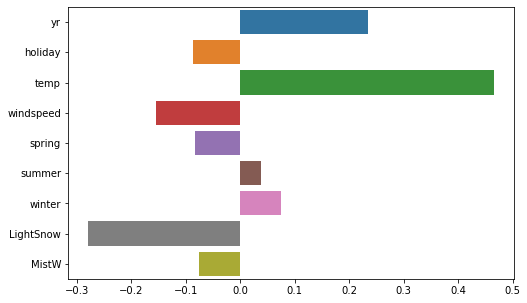

In [37]:
features=X_train.columns
plt.figure(figsize=(8,5))
sns.barplot(lm_7.params.values[1:],features);

- #### Here we see Year, temp, LightSnow, spring, windspeed, holiday are affect on total count of sharing bikes.

## Estimator Analysis

In [38]:
y_pred_train=lm_7.predict(X_train_sm)

In [39]:
# Residual error
rse=y_train-y_pred_train

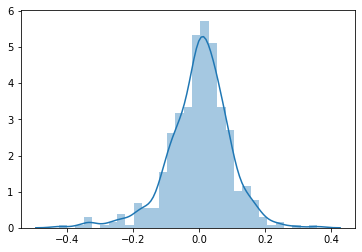

In [40]:
sns.distplot(rse)

- **Here we see error term are normally distributed with mean zero(not on axis x and y)**

In [61]:
sns.lineplot(y_train);

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

## Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [42]:
col_test=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
y_df[col_test]=scale.transform(y_df[col_test])
X_df.describe()

,yr,holiday,temp,windspeed,spring,summer,winter,LightSnow,MistW
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.320883,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.157763,0.225858,0.169803,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.414447,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Dividing data into y_test and X_test
y_test=y_df.pop("cnt")
X_test=y_df

In [44]:
# Adding constant variable to test dataframe
X_test_sm= sm.add_constant(X_test)

In [45]:
# dropping a droped data while modeling test set
X_test_sm=X_test_sm.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

In [46]:
#prediction on Test set
y_test_pred=lm_7.predict(X_test_sm)

In [47]:
#Evaluating accuracy score for train and test
print("r2 score for train",round(r2_score(y_train,y_pred_train),2))
print("r2 score for test",round(r2_score(y_test,y_test_pred),2))

r2 score for train 0.82
r2 score for test 0.8


### Bootstraping method

In [48]:
df2=df.sample(100)

In [49]:
col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df2[col_boot]=scale.transform(df2[col_boot])
df2.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,ClearW,LightSnow,MistW
count,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000
mean,0.510000,0.507273,0.01,0.518333,0.690000,0.571979,0.547249,0.542620,0.311642,0.532444,0.230000,0.310000,0.250000,0.640000,0.01,0.350000
std,0.502418,0.304454,0.10,0.350481,0.464823,0.224984,0.211320,0.185915,0.154841,0.212133,0.422953,0.464823,0.435194,0.482418,0.10,0.479372
min,0.000000,0.000000,0.00,0.000000,0.000000,0.094267,0.085601,0.173793,0.032077,0.047055,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
25%,0.000000,0.272727,0.00,0.166667,0.000000,0.394627,0.393405,0.401244,0.209209,0.404050,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
50%,1.000000,0.454545,0.00,0.500000,1.000000,0.606975,0.584775,0.534703,0.285417,0.497872,0.000000,0.000000,0.000000,1.000000,0.00,0.000000
75%,1.000000,0.750000,0.00,0.833333,1.000000,0.749232,0.702120,0.677817,0.388343,0.701306,0.000000,1.000000,0.250000,1.000000,0.00,1.000000
max,1.000000,1.000000,1.00,1.000000,1.000000,0.960541,0.939531,1.002776,0.816863,0.963300,1.000000,1.000000,1.000000,1.000000,1.00,1.000000


In [50]:
#Dividing data into y_test and X_test
y_test_df2=df2.pop("cnt")
X_test_df2=df2

In [51]:
X_test_sm_df2= sm.add_constant(X_test_df2)

In [52]:
X_test_sm_df2=X_test_sm_df2.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

In [53]:
y_test_pred_df2=lm_7.predict(X_test_sm_df2)

In [54]:
print("r2 score for test",r2_score(y_test_df2,y_test_pred_df2))

r2 score for test 0.7552115523229728


In [55]:
df3=df.sample(300)

col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df3[col_boot]=scale.transform(df3[col_boot])
df3.describe()

#Dividing data into y_test and X_test
y_test_df3=df3.pop("cnt")
X_test_df3=df3

X_test_sm_df3= sm.add_constant(X_test_df3)

X_test_sm_df3=X_test_sm_df3.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

y_test_pred_df3=lm_7.predict(X_test_sm_df3)

print("r2 score for test",r2_score(y_test_df3,y_test_pred_df3))

r2 score for test 0.8314563813282956


In [56]:
df3=df.sample(400)

col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df3[col_boot]=scale.transform(df3[col_boot])
df3.describe()

#Dividing data into y_test and X_test
y_test_df3=df3.pop("cnt")
X_test_df3=df3

X_test_sm_df3= sm.add_constant(X_test_df3)

X_test_sm_df3=X_test_sm_df3.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

y_test_pred_df3=lm_7.predict(X_test_sm_df3)

print("r2 score for test",r2_score(y_test_df3,y_test_pred_df3))

r2 score for test 0.8267225438454351


In [57]:
df3=df.sample(100)

col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df3[col_boot]=scale.transform(df3[col_boot])
df3.describe()

#Dividing data into y_test and X_test
y_test_df3=df3.pop("cnt")
X_test_df3=df3

X_test_sm_df3= sm.add_constant(X_test_df3)

X_test_sm_df3=X_test_sm_df3.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

y_test_pred_df3=lm_7.predict(X_test_sm_df3)

print("r2 score for test",r2_score(y_test_df3,y_test_pred_df3))

r2 score for test 0.7840239776342167


In [58]:
df3=df.sample(600)

col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df3[col_boot]=scale.transform(df3[col_boot])
df3.describe()

#Dividing data into y_test and X_test
y_test_df3=df3.pop("cnt")
X_test_df3=df3

X_test_sm_df3= sm.add_constant(X_test_df3)

X_test_sm_df3=X_test_sm_df3.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

y_test_pred_df3=lm_7.predict(X_test_sm_df3)

print("r2 score for test",r2_score(y_test_df3,y_test_pred_df3))

r2 score for test 0.8099225921048054


In [59]:
df3=df.sample(500)

col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df3[col_boot]=scale.transform(df3[col_boot])
df3.describe()

#Dividing data into y_test and X_test
y_test_df3=df3.pop("cnt")
X_test_df3=df3

X_test_sm_df3= sm.add_constant(X_test_df3)

X_test_sm_df3=X_test_sm_df3.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

y_test_pred_df3=lm_7.predict(X_test_sm_df3)

print("r2 score for test",r2_score(y_test_df3,y_test_pred_df3))

r2 score for test 0.8109998896073312


In [60]:
df3=df.sample(700)

col_boot=["mnth","weekday","temp","atemp","hum","windspeed","cnt"]
df3[col_boot]=scale.transform(df3[col_boot])
df3.describe()

#Dividing data into y_test and X_test
y_test_df3=df3.pop("cnt")
X_test_df3=df3

X_test_sm_df3= sm.add_constant(X_test_df3)

X_test_sm_df3=X_test_sm_df3.drop(['mnth','weekday','workingday','atemp','hum','ClearW'],axis=1)

y_test_pred_df3=lm_7.predict(X_test_sm_df3)

print("r2 score for test",r2_score(y_test_df3,y_test_pred_df3))

r2 score for test 0.8165834410565465
